# Setup

In [1]:
%matplotlib inline
%load_ext autoreload
%aimport magic
# Set path to MAGIC's output files:
magicdir = '<path>/' # Keep final '/'. Example: /Users/me/Documents/MAGIC/
# List statistics calculated (ie, prefixes of the different output files):
stats = ('stat1', 'stat2') # Example: ('pair', 'tbl', 'ttip', 'itip')

## Import data

In [3]:
# Import the data:
MAGIC = {stat: {} for stat in stats}

for stat in stats:
    with open(magicdir + '/{}_final.txt'.format(stat), 'r') as infile:
        MAGIC[stat]['T'] = magic.GammaMix(np.array([float(x) for line in infile for x in line.split()]))
    with open(magicdir + '/{}_LT.txt'.format(stat), 'r') as infile:
        MAGIC[stat]['LT'] = np.array([[float(x) for x in line.split()] for line in infile])

# Plots

In [2]:
statcolors = {stat: magic.tableau20[i*20//len(stats)] for i, stat in enumerate(stats)}

## Cumulative distributions

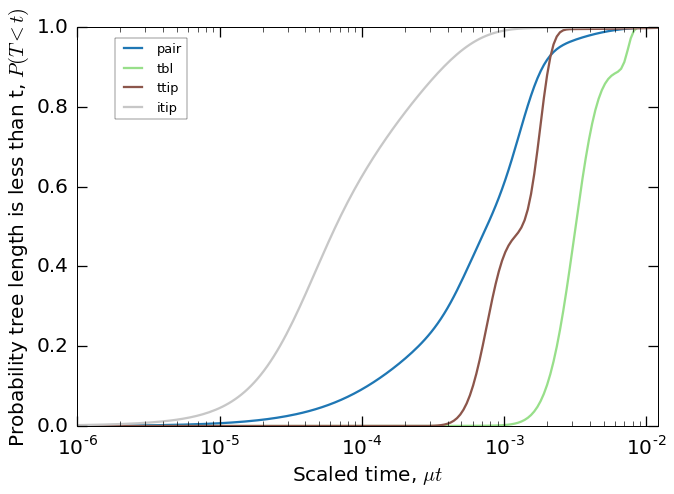

In [4]:
tvals = np.logspace(-6, -1.5, 200)

for stat in stats:
    plt.plot(tvals, MAGIC[stat]['T'].cdf(tvals), c=statcolors[stat], label=stat)

plt.xscale('log')
plt.ylim(0,1)
plt.xlim(1e-6,1.2e-2)
plt.legend(bbox_to_anchor=(.2, .99))
plt.xlabel('Scaled time, $\mu t$')
plt.ylabel('Probability tree length is less than t, $P(T<t)$')

## Laplace transforms

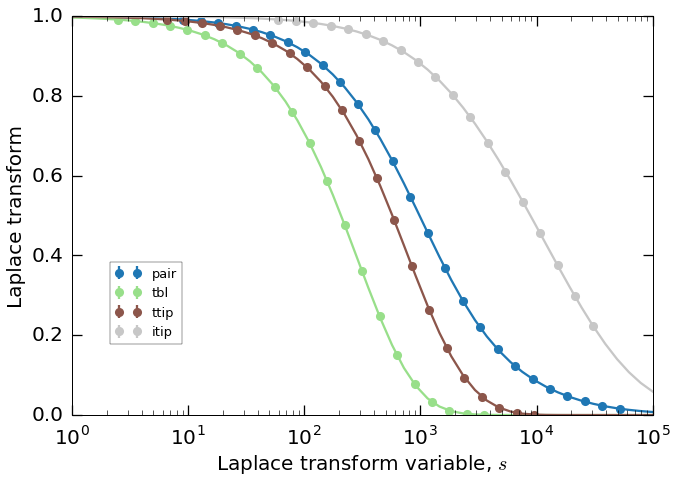

In [6]:
# Plot the original inferred Laplace transform values as points, and show fitted curves.

srange = np.logspace(0, 5)

for stat in stats:
    plt.errorbar(*zip(*MAGIC[stat]['LT']), fmt='o', c=statcolors[stat], label=stat) 
    plt.plot(srange, MAGIC[stat]['T'].lt(srange), c=statcolors[stat])
    
plt.xscale('log')
plt.legend(bbox_to_anchor=(.2, .4))
plt.xlabel('Laplace transform variable, $s$')
plt.ylabel('Laplace transform')

## "Effective population size"

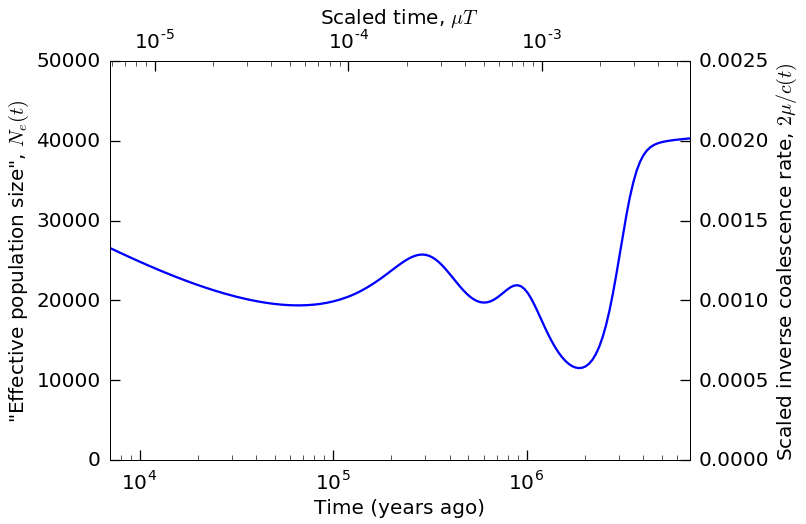

In [8]:
stat = 'pair'

pairrange = np.logspace(-5.5, -2, 200)

# Parameters to unscale human data:
mu = 1.25e-8
gen = 30
tfactor = 2*mu/gen
nfactor = 4*mu

# Plot limits in unscaled units:
nmax = 5e4 
tmin = 7e3
tmax = 7e6

plt.plot(pairrange / tfactor, MAGIC[stat]['T'].ne(pairrange) / nfactor)
plt.xscale('log')
plt.xlim(tmin, tmax)
plt.ylim(0, nmax)
plt.ylabel(r'"Effective population size", $N_e(t)$')
plt.xlabel('Time (years ago)')
plt.tick_params(which='both', top='off', right='off')

plt.twinx()
plt.ylabel(r'Scaled inverse coalescence rate, $2\mu/c(t)$')
plt.twiny()
plt.xscale('log')
plt.xlim(tmin * tfactor, tmax * tfactor)
plt.ylim(0, nmax * nfactor)
plt.xlabel(r'Scaled time, $\mu T$')